In [1]:
import polars as pl
benchmarks = pl.read_parquet('../data/benchmarks_nx.parquet')
factors = pl.read_parquet('../data/factors_nx.parquet')
targets = pl.read_parquet('../data/targets_nx.parquet')

In [2]:
import sys
sys.path.append('../')
import nebular_xplorer as nx

key_name = ['date', 'code']
full_data = nx.utils.prepare(factors, targets)
return_table = nx.utils.getReturnTable(full_data, 'factor1', '1d_forward_return',benchmarks)
metrics = nx.stat.metrics(full_data)
metrics_table = nx.stat.summaryMetrics(metrics)

[  Prepare(nx)  ]2024-08-17 22:11:35 | utils.py:nebular_xplorer.utils:prepare:28 | 4543 0:00:01.020663  
 └──── INFO: 
    Nx full data prepared from 20200102 to 20201231.
    Shape: (915277, 5)
    Days: 243 
    Num of avg codes: 3766


<Figure size 640x480 with 0 Axes>

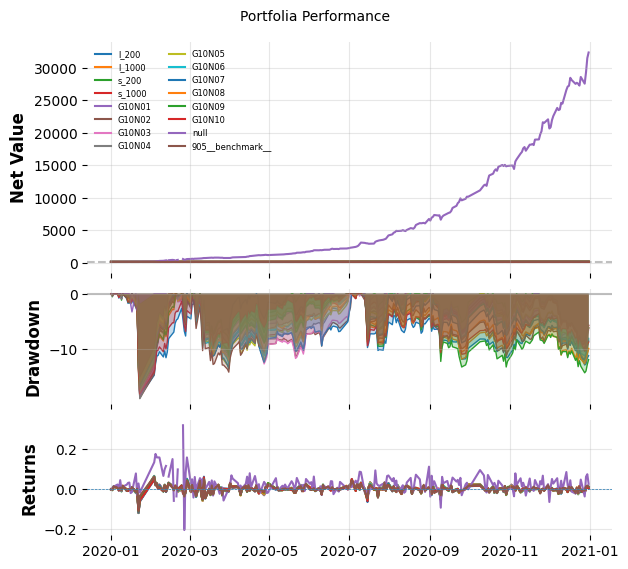

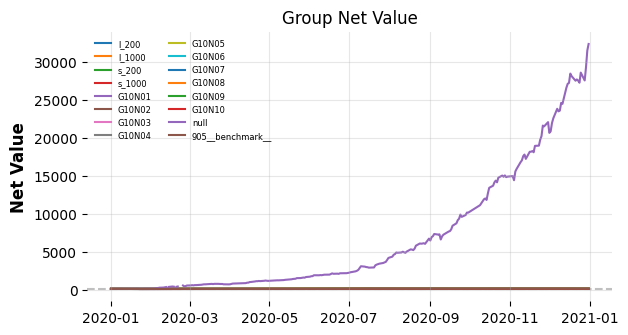

In [5]:
fig = nx.plots.snapshot(return_table)
fig2 = nx.plots.groupNav(return_table)

In [6]:
import io
import matplotlib.pyplot as plt
html = nx.report.HtmlTpl()
html.addElement('lujx', "{{author}}")
html.addElement('Alpha','{{title}}')
html.addTable(nx.stat.getPortStat(return_table).iloc[:,:3], '{{table1}}')
fig = nx.plots.snapshot(return_table)
buf = io.BytesIO()
plt.savefig(buf, format='png', dpi=300)
plt.close()
buf.seek(0)
html.addFigure(buf, '{{fig1}}')
fig2 = nx.plots.groupNav(return_table)
buf = io.BytesIO()
plt.savefig(buf, format='png', dpi=300)
plt.close()
buf.seek(0)
html.addFigure(buf, '{{fig2}}')
html.save('report.html')

<Figure size 640x480 with 0 Axes>

In [ ]:
monthly_return = return_table.resample('ME').apply(lambda x: (1+x).prod()-1)
monthly_return["Year"] = monthly_return.index.year
monthly_return["Month"] = monthly_return.index.month
pivot_returns = monthly_return.pivot(index="Year", columns="Month", values=col)
# sns.heatmap(pivot_returns, annot=True, fmt=".2f",
#         linewidths=0.5, annot_kws={"size": 8, "ha": 'center', "va": 'bottom'}, ax=axes[3])